### <center>Zelena Intan Mardita</center>
#### <center>F1D022103</center>

# Here you can put your extraordinary code

In [300]:
## import foo as bar
## ...
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Script "import matplotlib.pyplot as plt" digunakan untuk mengimport library matplotlib.pyplot yang digunakan untuk membuat plot grafik dan visualisasi data

Script "import numpy as np" digunakan untuk mengimport library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra

Script "import cv2 as cv" digunakan untuk mengimport library OpenCV yang digunakan untuk pengolahan citra dan video

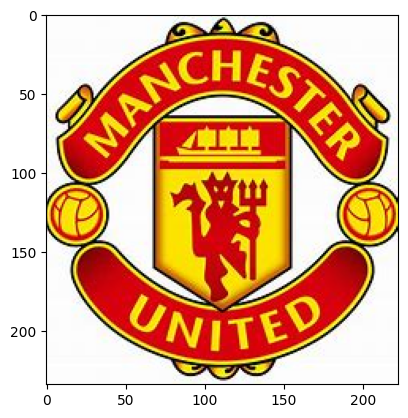

In [301]:
imgMU = plt.imread('../assets/manchester_united.jpeg')
plt.imshow(imgMU)

Script tersebut digunakan untuk membaca citra "../assets/manchester_united.jpeg" menggunakan fungsi imread() dari library matplotlib.image dan menampilkannya menggunakan fungsi imshow() dari matplotlib.pyplot.

imread() digunakan untuk membaca citra dari file dan mengembalikan nilai piksel citra dalam bentuk array numpy. 

### Menampilkan Citra Sebelum dan Setelah Gray Scaling

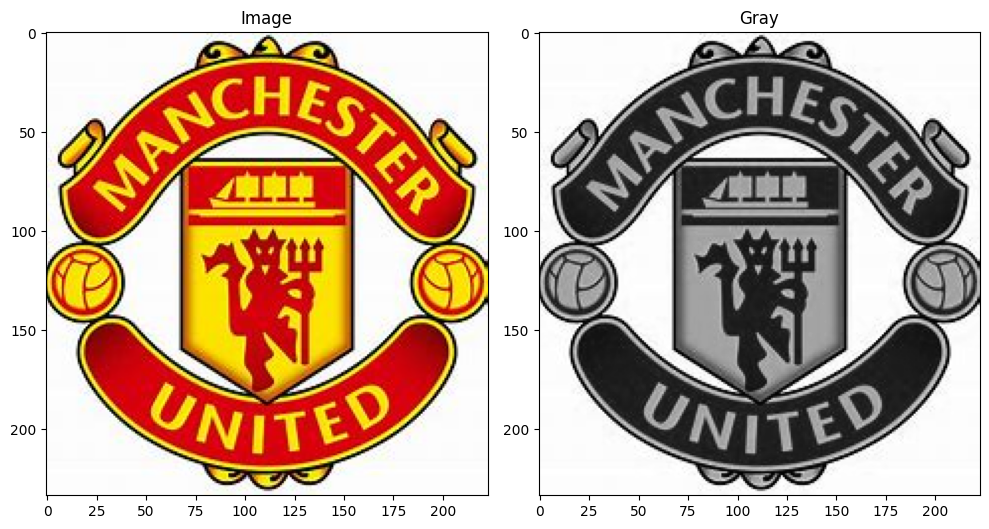

In [303]:
gray = cv.cvtColor(imgMU, cv.COLOR_BGR2GRAY)

plt.figure(figsize = (10, 10))
plt.subplot(121), plt.imshow(imgMU, cmap = 'gray'), plt.title('Image'), # plt.axis("off")
plt.subplot(122), plt.imshow(gray, cmap = 'gray'), plt.title('Gray'), # plt.axis("off")


plt.tight_layout()
plt.show()

Script di atas merupakan sebuah code yang digunakan untuk meng-import citra Iori Yagami lalu mengubahnya menjadi citra abu dengan fungsi `grayScaling`.

### Membuat Kernel

In [304]:
kernel3x3 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
])

kernel9x9 = np.array([
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
    [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
])

kernelSharpening = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9],
])

kernelSmoothing = np.array([
    [1/10, 1/10, 1/10],
    [1/10, 1/5, 1/10],
    [1/10, 1/10, 1/10],
])

Kode di atas mendefinisikan beberapa kernel untuk pemrosesan citra menggunakan teknik konvolusi. Pertama, `kernel3x3` dan `kernel9x9` adalah kernel untuk filter rata-rata. `kernel3x3` adalah kernel 3x3 dengan setiap elemen memiliki nilai 1/9, memberikan efek rata-rata pada citra untuk mengurangi noise dan membuat gambar menjadi lebih halus. Sedangkan `kernel9x9` adalah versi yang lebih besar dengan ukuran 9x9 dan nilai elemen 1/81, memberikan efek smoothing yang lebih kuat. Selanjutnya, `kernelSharpening` digunakan untuk meningkatkan ketajaman citra dengan nilai tinggi (8/9) di tengah dan nilai rendah (1/9) di sekitarnya. Ini meningkatkan perbedaan intensitas antara piksel dan tetangganya, menghasilkan citra yang lebih tajam. Terakhir, `kernelSmoothing` adalah kernel yang memberikan efek smoothing dengan nilai yang lebih tinggi di tengah (1/5) daripada di tepi (1/10), berguna untuk mengurangi noise tanpa mengaburkan detail yang signifikan.

### Mean

In [305]:
def getPadding(image, kernel):
   i = (kernel.shape[1]-1)//2
   j = (kernel.shape[0]-1)//2
   left = i
   right = (kernel.shape[1]-1)-i
   top = j
   bottom = (kernel.shape[0]-1)-j
   results = np.pad(image, ((top, bottom),(left, right)), mode='edge')
   return results

Fungsi `getPadding` menerima citra dan kernel sebagai argumen dan mengembalikan citra yang telah dipad dengan tepi sesuai dengan ukuran kernel. Pertama, fungsi ini menghitung jumlah padding yang diperlukan di sekitar citra berdasarkan ukuran kernel. Variabel `i` dan `j` dihitung sebagai setengah dari lebar dan tinggi kernel, masing-masing. Kemudian, variabel `left`, `right`, `top`, dan `bottom` dihitung berdasarkan nilai `i` dan `j` untuk menentukan jumlah padding yang diperlukan di setiap sisi citra. Setelah itu, fungsi menggunakan fungsi `np.pad` dari NumPy untuk menambahkan padding ke citra. Padding dilakukan dengan mode 'edge', yang berarti nilai piksel di tepi citra akan diulang untuk membentuk tepi citra yang dipad. Hasil akhir adalah citra yang telah dipad sesuai dengan ukuran kernel yang diberikan.

In [306]:
def convolution (image, kernel):
   results = np.zeros(image.shape).astype(int)
   paddingImage = getPadding(image, kernel)
   for i in range(image.shape[0]):
      for j in range(image.shape[1]):
         temp = 0
         for k in range(kernel.shape[0]):
            for l in range(kernel.shape[1]):
               temp += paddingImage[i+k, j+l] * kernel[k, l]
         results[i][j] = temp
   return results

Fungsi `convolution` mengimplementasikan operasi konvolusi antara citra dan kernel yang diberikan. Pertama, fungsi membuat matriks kosong `result` dengan ukuran yang sama dengan citra input. Selanjutnya, citra input dipad menggunakan fungsi `getPadding`, sehingga kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Proses konvolusi dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input akan dikonvolusikan dengan kernel. Variabel `sum` diinisialisasi sebagai 0 dan digunakan untuk mengakumulasikan hasil perkalian antara piksel citra dan nilai kernel yang sesuai. Fungsi tersebut kemudian mengembalikan hasil konvolusi dengan menggunakan fungsi `cv.filter2D` dari OpenCV, yang menerapkan filter 2D (kernel) pada citra input. Namun, terdapat permasalahan pada kode ini, di mana pengembalian nilai `result` dan `cv.filter2D` terjadi pada setiap iterasi dalam nested loop, yang menyebabkan fungsi akan mengembalikan hasil pada iterasi pertama saja. Hal ini dapat diperbaiki dengan memindahkan statement `return result` ke luar dari nested loop, sehingga keseluruhan hasil konvolusi dapat dikembalikan setelah proses konvolusi selesai dilakukan.

In [307]:
def mean(image, kernel):
   results = np.zeros(image.shape).astype(int)
   paddingImage = getPadding(image, kernel)
   for i in range(image.shape[0]):
      for j in range(image.shape[1]):
         temp = 0
         for k in range(kernel.shape[0]):
            for l in range(kernel.shape[1]):
               temp += paddingImage[i+k, j+l] * kernel[k, l]
         results[i][j] = temp
   return results

Fungsi `mean` mengimplementasikan filter rata-rata pada citra menggunakan kernel yang diberikan. Pertama, fungsi membuat matriks kosong `results` dengan ukuran yang sama dengan citra input. Selanjutnya, citra input dipad menggunakan fungsi `getPadding`, sehingga kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Proses filter rata-rata dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input akan dihitung nilai rata-ratanya berdasarkan nilai piksel di sekitarnya sesuai dengan ukuran kernel. Variabel `temp` diinisialisasi sebagai 0 dan digunakan untuk mengakumulasikan hasil perkalian antara nilai piksel citra dan nilai kernel yang sesuai. Setelah selesai mengakumulasikan nilai dari setiap piksel, nilai tersebut ditetapkan sebagai nilai piksel baru pada matriks hasil `results`. Fungsi kemudian mengembalikan hasil filter rata-rata yang telah diaplikasikan pada citra input.

### Median

In [308]:
def sortValue(filter):
   for i in range(len(filter)-1):
      for j in range(i+1,len(filter)):
         if filter[i] > filter[j]:
            temp = filter[i]
            filter[i] = filter[j]
            filter[j] = temp
   return filter

Fungsi `sortValue` mengimplementasikan algoritma pengurutan sederhana untuk mengurutkan nilai dalam sebuah array secara menaik. Dengan menggunakan nested loop, setiap elemen dalam array diperbandingkan satu sama lain. Jika elemen pada posisi tertentu lebih besar dari elemen pada posisi berikutnya, maka kedua elemen tersebut ditukar posisinya. Proses ini dilakukan untuk setiap pasangan elemen dalam array hingga seluruh array terurut secara menaik. Setelah proses pengurutan selesai, array yang telah diurutkan dikembalikan sebagai output dari fungsi. Algoritma pengurutan ini memiliki kompleksitas waktu O(n^2), di mana n adalah jumlah elemen dalam array. Meskipun sederhana, algoritma ini dapat mengurutkan array dengan baik untuk jumlah elemen yang tidak terlalu besar.

In [309]:
def getMiddle(filter):
    sorted = sortValue(filter)
    length = len(filter)
    if length % 2 == 0:
        x1 = (length + 1) // 2
        x2 = x1 + 1
        value = (sorted[x1-1] + sorted[x2-1]) / 2
        return value
    else:
        value = (length + 1) // 2
        return sorted[value-1]

Fungsi `getMiddle` bertujuan untuk menghitung nilai tengah (median) dari sebuah array setelah array tersebut diurutkan. Pertama, fungsi memanggil fungsi `sortValue` untuk mengurutkan nilai dalam array secara menaik. Selanjutnya, panjang array dihitung dengan menggunakan fungsi `len`. Fungsi kemudian memeriksa apakah jumlah elemen dalam array genap atau ganjil. Jika jumlahnya genap, maka nilai tengah dihitung sebagai rata-rata dari dua nilai tengah dari array yang diurutkan. Jika jumlahnya ganjil, maka nilai tengah dihitung sebagai nilai pada posisi tengah dari array yang diurutkan. Setelah itu, nilai tengah yang telah dihitung dikembalikan sebagai output dari fungsi. Proses ini memungkinkan pengguna untuk mendapatkan nilai tengah dari sebuah kumpulan data, yang dapat berguna dalam berbagai konteks seperti analisis data atau pengolahan sinyal.

In [310]:
def median(image, kernel):
    results = np.zeros(image.shape).astype(int)
    tempKernel = np.ones(kernel.shape)
    paddingImage = getPadding(image, tempKernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = []
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    temp += [paddingImage[i+k, j+l]]
            value = getMiddle(temp)
            results[i][j] = value
    return results

Fungsi `median` bertujuan untuk menerapkan filter median pada citra menggunakan kernel yang diberikan. Pertama, fungsi membuat matriks kosong `results` dengan ukuran yang sama dengan citra input. Kemudian, sebuah kernel sementara (`tempKernel`) dengan ukuran yang sama dengan kernel yang diberikan, namun diisi dengan nilai 1, dibuat untuk digunakan dalam pemrosesan citra menggunakan fungsi `getPadding`. Citra input kemudian dipad menggunakan fungsi `getPadding` dengan kernel sementara, sehingga kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Proses filter median dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input akan diambil nilai-nilai tetangganya sesuai dengan ukuran kernel, dan nilai median dari nilai-nilai tersebut dihitung menggunakan fungsi `getMiddle`. Hasil nilai median kemudian ditetapkan sebagai nilai piksel baru pada matriks hasil `results`. Setelah proses selesai dilakukan untuk setiap piksel dalam citra, hasil filter median dikembalikan sebagai output dari fungsi. Teknik ini berguna dalam pengurangan noise pada citra tanpa mengaburkan detailnya, karena nilai median tidak terpengaruh oleh nilai ekstrem seperti pada filter rata-rata.

### Modus

In [311]:
def findModus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1   
    max = 0
    modus = None
    for num, value in count.items():
        if value > max:
            max = value
            modus = num
    return modus

Fungsi `findModus` dirancang untuk mencari modus dari sebuah array. Modus adalah nilai yang paling sering muncul dalam kumpulan data. Pertama, fungsi membuat kamus kosong `count` untuk menghitung frekuensi kemunculan setiap nilai dalam array. Selanjutnya, dengan menggunakan loop, setiap nilai dalam array diperiksa dan jumlah kemunculannya dihitung. Jika nilai tersebut telah ada dalam kamus `count`, frekuensinya ditambah satu; jika tidak, nilai tersebut dimasukkan ke dalam kamus dengan frekuensi awal satu. Setelah menghitung frekuensi kemunculan setiap nilai dalam array, fungsi mencari nilai yang memiliki frekuensi kemunculan terbanyak sebagai modus. Variabel `max` dan `modus` diinisialisasi dengan nilai awal, kemudian diupdate saat ditemukan nilai dengan frekuensi kemunculan tertinggi. Akhirnya, nilai modus dikembalikan sebagai output dari fungsi. Dengan demikian, fungsi ini berguna untuk menentukan nilai yang paling sering muncul dalam kumpulan data, yang dapat memberikan wawasan tentang pola atau distribusi data tersebut.

In [312]:
def modus(image, kernel):
    paddImage = getPadding(image, kernel)
    result = np.zeros([image.shape[0], image.shape[1]]) 
    for i in range(image.shape[0]):
         for j in range(image.shape[1]):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(kernel.shape[0]):
                 for l in range(kernel.shape[1]):
                     temp[indeks] += paddImage[i+k,j+l]
                     indeks+=1
                     result[i,j] = findModus(temp)
    return result 

Fungsi `modus` bertujuan untuk menerapkan filter modus pada citra menggunakan kernel yang diberikan. Pertama, citra input dipad menggunakan fungsi `getPadding` dengan kernel yang diberikan, sehingga kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Kemudian, matriks kosong `result` dibuat dengan ukuran yang sama dengan citra input, yang akan menyimpan hasil dari filter modus. Proses filter modus dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input akan diambil nilai-nilai tetangganya sesuai dengan ukuran kernel, kemudian nilai modus dari nilai-nilai tersebut dihitung menggunakan fungsi `findModus`. Hasil nilai modus kemudian ditetapkan sebagai nilai piksel baru pada matriks hasil `result`. Setelah proses selesai dilakukan untuk setiap piksel dalam citra, hasil filter modus dikembalikan sebagai output dari fungsi. Teknik ini berguna dalam pengurangan noise pada citra dan dapat memberikan representasi yang lebih baik tentang nilai yang paling umum muncul dalam tetanggaan piksel, yang dapat berguna dalam analisis citra atau pemrosesan digital lainnya.

In [313]:
def sharpening(image, kernel):
    results = np.zeros(image.shape).astype(int)
    paddingImage = getPadding(image, kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    temp += paddingImage[i+k, j+l] * kernel[k, l]
            results[i][j] = temp
    return results

def smoothing(image, kernel):
    results = np.zeros(image.shape).astype(int)
    paddingImage = getPadding(image, kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    temp += paddingImage[i+k, j+l] * kernel[k, l]
            results[i][j] = temp
    return results


Kode di atas mendefinisikan dua fungsi yang masing-masing bertujuan untuk melakukan operasi pemrosesan citra, yaitu fungsi `sharpening` dan `smoothing`. Kedua fungsi ini menggunakan teknik konvolusi untuk memanipulasi citra dengan menggunakan kernel yang diberikan. Pertama, fungsi `sharpening` bertujuan untuk meningkatkan ketajaman citra. Citra input dipad menggunakan fungsi `getPadding` agar kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Selanjutnya, proses konvolusi dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input dihitung nilai baru berdasarkan hasil perkalian dengan nilai kernel yang sesuai. Hasil konvolusi tersebut kemudian ditetapkan sebagai nilai piksel baru pada matriks hasil `results`. Fungsi `smoothing`, di sisi lain, bertujuan untuk menghaluskan citra dengan mengurangi noise dan detail yang tidak diinginkan. Prosesnya hampir serupa dengan `sharpening`, di mana citra input juga dipad dan konvolusi dilakukan menggunakan nested loop. Namun, kali ini, hasil konvolusi ditetapkan sebagai nilai piksel baru yang lebih halus dan dianggap sebagai citra yang sudah disaring atau "dilumaskan". Keduanya adalah operasi dasar dalam pengolahan citra yang penting untuk berbagai aplikasi seperti pemrosesan gambar medis, analisis citra, dan pengolahan video.

In [314]:
meanFilter3x3 = mean(gray, kernel3x3)
meanFilter9x9 = mean(gray, kernel9x9)

medianFilter3x3 = median(gray, kernel3x3)
medianFilter9x9 = median(gray, kernel9x9)

modusFilter3x3 = modus(gray, kernel3x3)
modusFilter9x9 = modus(gray, kernel9x9)

sharpenedFilter = sharpening(gray, kernelSharpening)
smoothedFilter = smoothing(gray, kernelSmoothing)

Dalam kode di atas, dilakukan penerapan berbagai jenis filter pemrosesan citra pada citra grayscale `gray` menggunakan kernel yang telah ditentukan sebelumnya. Pertama, dilakukan pemrosesan dengan filter rata-rata (`mean`) menggunakan kernel 3x3 dan 9x9. Filter ini bertujuan untuk mengurangi noise dan membuat citra menjadi lebih halus dengan cara meratakan intensitas piksel di sekitarnya. Selanjutnya, dilakukan pemrosesan dengan filter median (`median`) menggunakan kernel yang sama, 3x3 dan 9x9. Filter median menggantikan nilai setiap piksel dengan nilai median dari nilai piksel di sekitarnya, yang efektif dalam menghilangkan noise salt-and-pepper. Selain itu, dilakukan juga pemrosesan dengan filter modus (`modus`) menggunakan kernel yang sama. Filter ini menentukan nilai piksel baru berdasarkan nilai modus dari nilai piksel di sekitarnya, berguna untuk mengurangi noise dan mempertahankan detail pada citra. Selanjutnya, dilakukan pemrosesan dengan filter sharpening (`sharpening`) menggunakan kernel yang telah ditentukan sebelumnya. Filter ini bertujuan untuk meningkatkan ketajaman citra dengan meningkatkan perbedaan intensitas antara piksel dan tetangganya. Terakhir, dilakukan pemrosesan dengan filter smoothing (`smoothing`) menggunakan kernel yang telah ditentukan. Filter ini digunakan untuk menghaluskan citra dengan mengurangi noise dan detail yang tidak diinginkan, menghasilkan citra yang lebih halus dan terlihat lebih estetis. Melalui proses ini, berbagai filter dapat diterapkan untuk menghasilkan citra yang sesuai dengan kebutuhan atau tujuan pemrosesan tertentu.

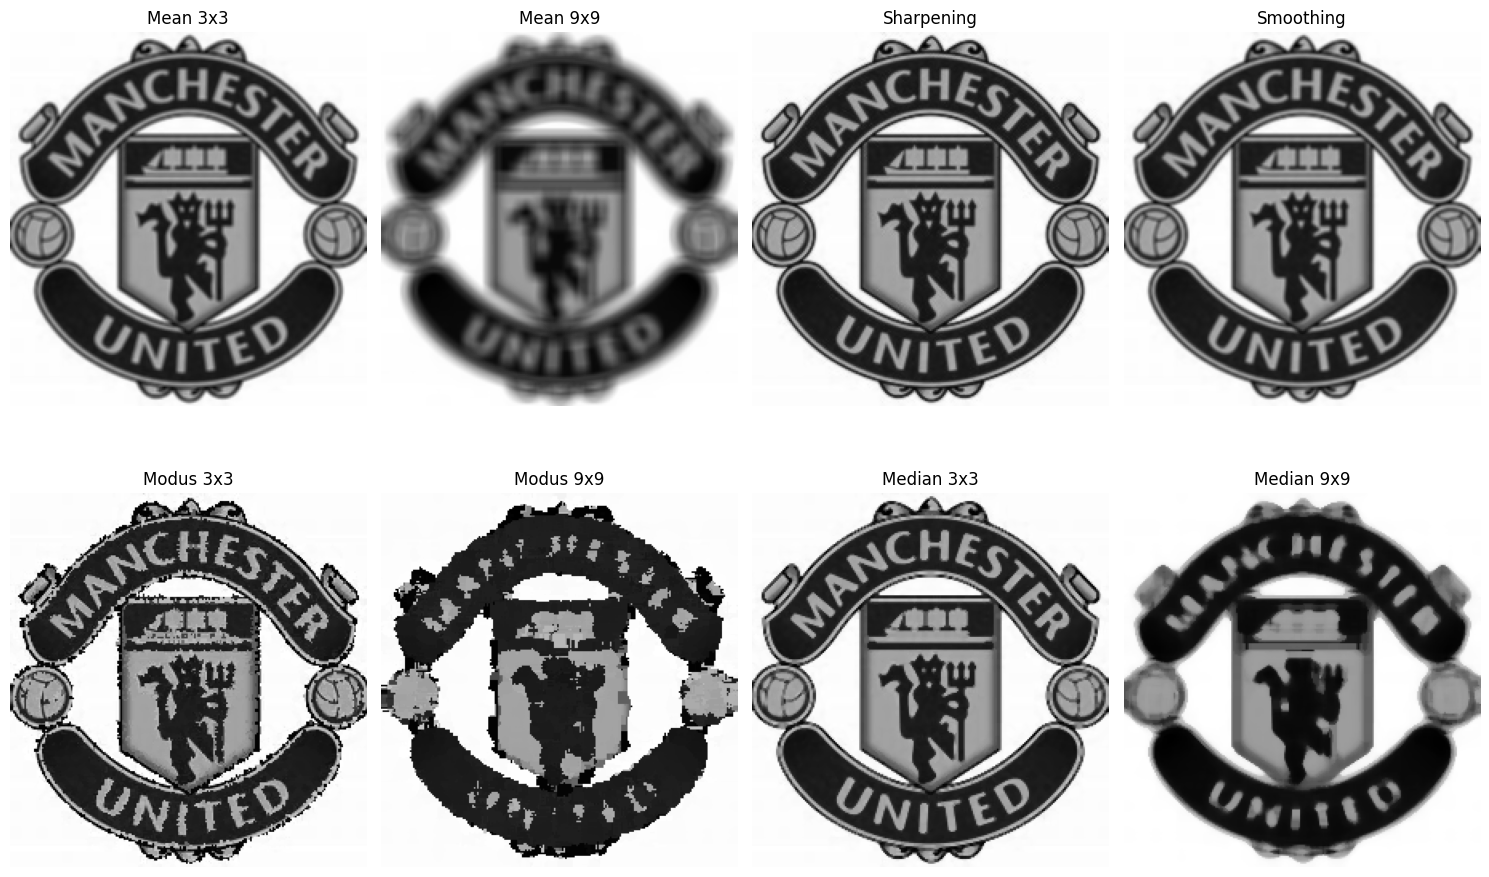

In [315]:
plt.figure(figsize=(15, 10))

plt.subplot(241), plt.imshow(meanFilter3x3, cmap='gray'), plt.title('Mean 3x3') , plt.axis("off")
plt.subplot(242), plt.imshow(meanFilter9x9, cmap='gray'), plt.title('Mean 9x9'), plt.axis("off")

plt.subplot(244), plt.imshow(smoothedFilter, cmap='gray'), plt.title('Smoothing'), plt.axis("off")
plt.subplot(243), plt.imshow(sharpenedFilter, cmap='gray'), plt.title('Sharpening'), plt.axis("off")

plt.subplot(245), plt.imshow(modusFilter3x3, cmap='gray'), plt.title('Modus 3x3'), plt.axis("off")
plt.subplot(246), plt.imshow(modusFilter9x9, cmap='gray'), plt.title('Modus 9x9'), plt.axis("off")

plt.subplot(247), plt.imshow(medianFilter3x3, cmap='gray'), plt.title('Median 3x3'), plt.axis("off")
plt.subplot(248), plt.imshow(medianFilter9x9, cmap='gray'), plt.title('Median 9x9'), plt.axis("off")

plt.tight_layout()
plt.show()

Kode di atas menggunakan matplotlib untuk membuat visualisasi dari hasil-hasil pemrosesan citra menggunakan berbagai jenis filter. Dalam gambar hasil, terdapat beberapa subplot yang masing-masing menampilkan citra hasil pemrosesan dengan filter tertentu. Setiap subplot disusun secara berdampingan menggunakan `plt.subplot` dan diatur ukuran figur dengan `plt.figure(figsize=(15, 10))`. Setiap citra hasil pemrosesan ditampilkan menggunakan `plt.imshow` dengan colormap 'gray' untuk menampilkan citra dalam skala abu-abu. Judul dari masing-masing subplot ditambahkan dengan `plt.title`, dan sumbu plotnya dinonaktifkan dengan `plt.axis("off")` agar tidak ditampilkan. Subplot-subplot tersebut terdiri dari hasil pemrosesan menggunakan filter rata-rata (mean), filter smoothing, filter sharpening, filter modus, dan filter median, masing-masing dengan ukuran kernel 3x3 dan 9x9. Setelah semua subplot terdefinisi, `plt.tight_layout()` digunakan untuk memastikan bahwa semua subplot ditampilkan dengan baik dalam layout yang konsisten, dan `plt.show()` digunakan untuk menampilkan keseluruhan figur. Dengan demikian, kode ini memungkinkan untuk dengan jelas membandingkan hasil dari berbagai teknik pemrosesan citra yang telah diterapkan pada citra grayscale yang diberikan.

In [316]:
# Metode Sobel
sx = np.array([ #Sobel Horizontal
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sy = np.array([ #Sobel Vertikal
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

# Metode Prewitt
px = np.array([ #Prewitt Horizontal
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
py = np.array([ #Prewitt Vertikal
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

# Metode Robert
rx = np.array([ #Robert Horizontal
    [1, 0],
    [0, -1]
])
ry = np.array([ #Robert Vertikal
    [0, 1],
    [-1, 0]
])

Kode di atas mendefinisikan matriks kernel untuk beberapa metode deteksi tepi dalam pemrosesan citra, yaitu metode Sobel, Prewitt, dan Robert. Pertama, untuk metode Sobel, terdapat dua kernel yang didefinisikan: `sx` untuk deteksi tepi horizontal dan `sy` untuk deteksi tepi vertikal. Kernel Sobel ini dirancang untuk menangkap perubahan gradien citra dalam arah horizontal dan vertikal. Selanjutnya, untuk metode Prewitt, juga terdapat dua kernel yang didefinisikan: `px` untuk deteksi tepi horizontal dan `py` untuk deteksi tepi vertikal. Kernel Prewitt memiliki tujuan yang sama dengan Sobel, yaitu untuk mendeteksi tepi dalam citra dengan mengidentifikasi perubahan gradien dalam arah horizontal dan vertikal. Terakhir, untuk metode Robert, terdapat dua kernel yang didefinisikan: `rx` untuk deteksi tepi horizontal dan `ry` untuk deteksi tepi vertikal. Kernel Robert juga digunakan untuk mendeteksi tepi dalam citra dengan mengukur perbedaan intensitas antara piksel-piksel tetangga dalam arah horizontal dan vertikal. Dengan mendefinisikan matriks kernel ini, kita dapat menerapkan berbagai metode deteksi tepi dalam pemrosesan citra untuk mengidentifikasi garis dan batas objek dalam citra.

In [318]:
def konvolusi (image, kernel): 
    panjang, lebar = image.shape 
    panjangkernel, lebarkernel = kernel.shape 
    centerx, centery = int((panjangkernel - 1)/2), int((lebarkernel - 1)/2)

    padding =  np.pad(array = image, pad_width = ((centerx, panjangkernel-1-centerx), (centery, lebarkernel-1-centery)), mode ="constant") 

    result = np.zeros(image.shape)
    for i in range(panjang):
        for j in range(lebar): 
            for k in range(panjangkernel): 
                for l in range(lebarkernel): 
                    result[i,j] += padding[i+k, j+l] * kernel[k,l] 
    return result

Fungsi `konvolusi` bertujuan untuk menerapkan operasi konvolusi antara citra dan kernel yang diberikan. Pertama, fungsi mengambil dimensi citra dan kernel menggunakan properti `.shape`. Selanjutnya, fungsi menghitung pusat kernel (`centerx`, `centery`) dengan membagi panjang dan lebar kernel yang telah diambil dari nilai yang telah ditentukan. Kemudian, citra dipad menggunakan fungsi `np.pad` dengan mode "constant" untuk menambahkan tepi citra sesuai dengan ukuran kernel. Padding dilakukan agar kernel dapat diterapkan pada setiap piksel citra tanpa terjadi kesalahan indeks. Setelah itu, sebuah matriks hasil yang terinisialisasi dengan nilai nol dibuat dengan ukuran yang sama dengan citra input. Proses konvolusi dilakukan dengan menggunakan nested loop, di mana setiap piksel pada citra input dihitung nilai baru berdasarkan hasil perkalian dengan nilai kernel yang sesuai. Hasil konvolusi tersebut kemudian ditetapkan sebagai nilai piksel baru pada matriks hasil. Setelah proses selesai dilakukan untuk setiap piksel dalam citra, matriks hasil konvolusi dikembalikan sebagai output dari fungsi. Dengan demikian, fungsi ini memungkinkan untuk menerapkan operasi konvolusi yang berguna dalam berbagai aplikasi pengolahan citra seperti deteksi tepi, pemulusan, atau penguatan citra.

In [319]:
def deteksi(img, resultx, resulty):
  hasil = np.zeros(img.shape)
  hasil = np.sqrt(abs(pow(resultx,2)) + abs(pow(resulty,2)))
  return hasil

Fungsi `deteksi` dirancang untuk melakukan deteksi tepi pada citra dengan memanfaatkan hasil dari dua filter, yaitu `resultx` (hasil konvolusi dengan filter deteksi tepi horizontal) dan `resulty` (hasil konvolusi dengan filter deteksi tepi vertikal). Pertama, fungsi membuat matriks kosong `hasil` dengan ukuran yang sama dengan citra input. Selanjutnya, proses deteksi tepi dilakukan dengan menggunakan formula perhitungan gradien magnitudo, yaitu akar kuadrat dari penjumlahan kuadrat nilai gradien horizontal dan gradien vertikal untuk setiap piksel. Dalam kode ini, nilai gradien untuk setiap arah (horizontal dan vertikal) dihitung menggunakan `pow` (pangkat) dan `abs` (nilai absolut) untuk memastikan hasilnya selalu positif. Hasil perhitungan ini kemudian diakumulasikan dan diakar kuadratkan. Akhirnya, matriks hasil deteksi tepi dikembalikan sebagai output dari fungsi. Dengan demikian, fungsi ini memungkinkan untuk menghasilkan citra yang menunjukkan di mana tepi objek atau perubahan signifikan dalam intensitas citra terjadi, yang berguna dalam berbagai aplikasi pengolahan citra seperti segmentasi objek dan pengenalan pola.

In [320]:
# Sobel

# Mean
konvolusiMeanSX3x3 = konvolusi(meanFilter3x3,sx)
konvolusiMeanSY3x3 = konvolusi(meanFilter3x3,sy)
hasilMeanS3x3 = deteksi(meanFilter3x3, konvolusiMeanSX3x3, konvolusiMeanSY3x3)

konvolusiMeanSX9x9 = konvolusi(meanFilter9x9,sx)
konvolusiMeanSY9x9 = konvolusi(meanFilter9x9,sy)
hasilMeanS9x9 = deteksi(meanFilter9x9, konvolusiMeanSX9x9, konvolusiMeanSY9x9)

# Median
konvolusiMedianSX3x3 = konvolusi(medianFilter3x3,sx)
konvolusiMedianSY3x3 = konvolusi(medianFilter3x3,sy)
hasilMedianS3x3 = deteksi(medianFilter3x3, konvolusiMedianSX3x3, konvolusiMedianSY3x3)

konvolusiMedianSX9x9 = konvolusi(medianFilter9x9,sx)
konvolusiMedianSY9x9 = konvolusi(medianFilter9x9,sy)
hasilMedianS9x9 = deteksi(medianFilter9x9, konvolusiMedianSX9x9, konvolusiMedianSY9x9)

#Modus
konvolusiModusSX3x3 = konvolusi(modusFilter3x3,sx)
konvolusiModusSY3x3 = konvolusi(modusFilter3x3,sy)
hasilModusS3x3 = deteksi(modusFilter3x3, konvolusiModusSX3x3, konvolusiModusSY3x3)

konvolusiModusSX9x9 = konvolusi(modusFilter9x9,sx)
konvolusiModusSY9x9 = konvolusi(modusFilter9x9,sy)
hasilModusS9x9 = deteksi(modusFilter9x9, konvolusiModusSX9x9, konvolusiModusSY9x9)

# Sharpening
konvolusiSharpSX3x3 = konvolusi(sharpenedFilter,sx)
konvolusiSharpSY3x3 = konvolusi(sharpenedFilter,sy)
hasilSharp = deteksi(sharpenedFilter, konvolusiSharpSX3x3, konvolusiSharpSY3x3)

# Smoothing
konvolusiSmoothSX3x3 = konvolusi(smoothedFilter,sx)
konvolusiSmoothSY3x3 = konvolusi(smoothedFilter,sy)
hasilSmooth = deteksi(smoothedFilter, konvolusiSmoothSX3x3, konvolusiSmoothSY3x3)

Kode di atas melakukan pengaplikasian filter deteksi tepi Sobel pada berbagai hasil pemrosesan citra sebelumnya, baik itu hasil dari filter rata-rata (mean), filter median, filter modus, filter sharpening, maupun filter smoothing. Pertama, dilakukan pengaplikasian filter Sobel pada hasil dari filter rata-rata dengan ukuran kernel 3x3 dan 9x9. Proses ini menghasilkan `konvolusiMeanSX3x3`, `konvolusiMeanSY3x3`, `konvolusiMeanSX9x9`, dan `konvolusiMeanSY9x9` yang merupakan hasil konvolusi dengan filter Sobel untuk deteksi tepi horizontal (SX) dan vertikal (SY) dari citra yang telah dihaluskan dengan filter rata-rata. Selanjutnya, dilakukan proses yang serupa untuk hasil dari filter median dan modus, menghasilkan `konvolusiMedianSX3x3`, `konvolusiMedianSY3x3`, `konvolusiMedianSX9x9`, `konvolusiMedianSY9x9`, `konvolusiModusSX3x3`, `konvolusiModusSY3x3`, `konvolusiModusSX9x9`, dan `konvolusiModusSY9x9`. Kemudian, dilakukan pengaplikasian filter Sobel pada hasil dari filter sharpening, menghasilkan `konvolusiSharpSX3x3` dan `konvolusiSharpSY3x3`. Terakhir, dilakukan pengaplikasian filter Sobel pada hasil dari filter smoothing, menghasilkan `konvolusiSmoothSX3x3` dan `konvolusiSmoothSY3x3`. Setiap proses tersebut diikuti dengan pemanggilan fungsi `deteksi` yang bertujuan untuk menghitung gradien magnitudo dari gradien horizontal dan vertikal menggunakan rumus perhitungan yang telah dijelaskan sebelumnya. Dengan melakukan proses ini, kita dapat mengidentifikasi di mana tepi objek atau perubahan signifikan dalam intensitas citra terjadi setelah menerapkan berbagai macam filter pemrosesan citra.

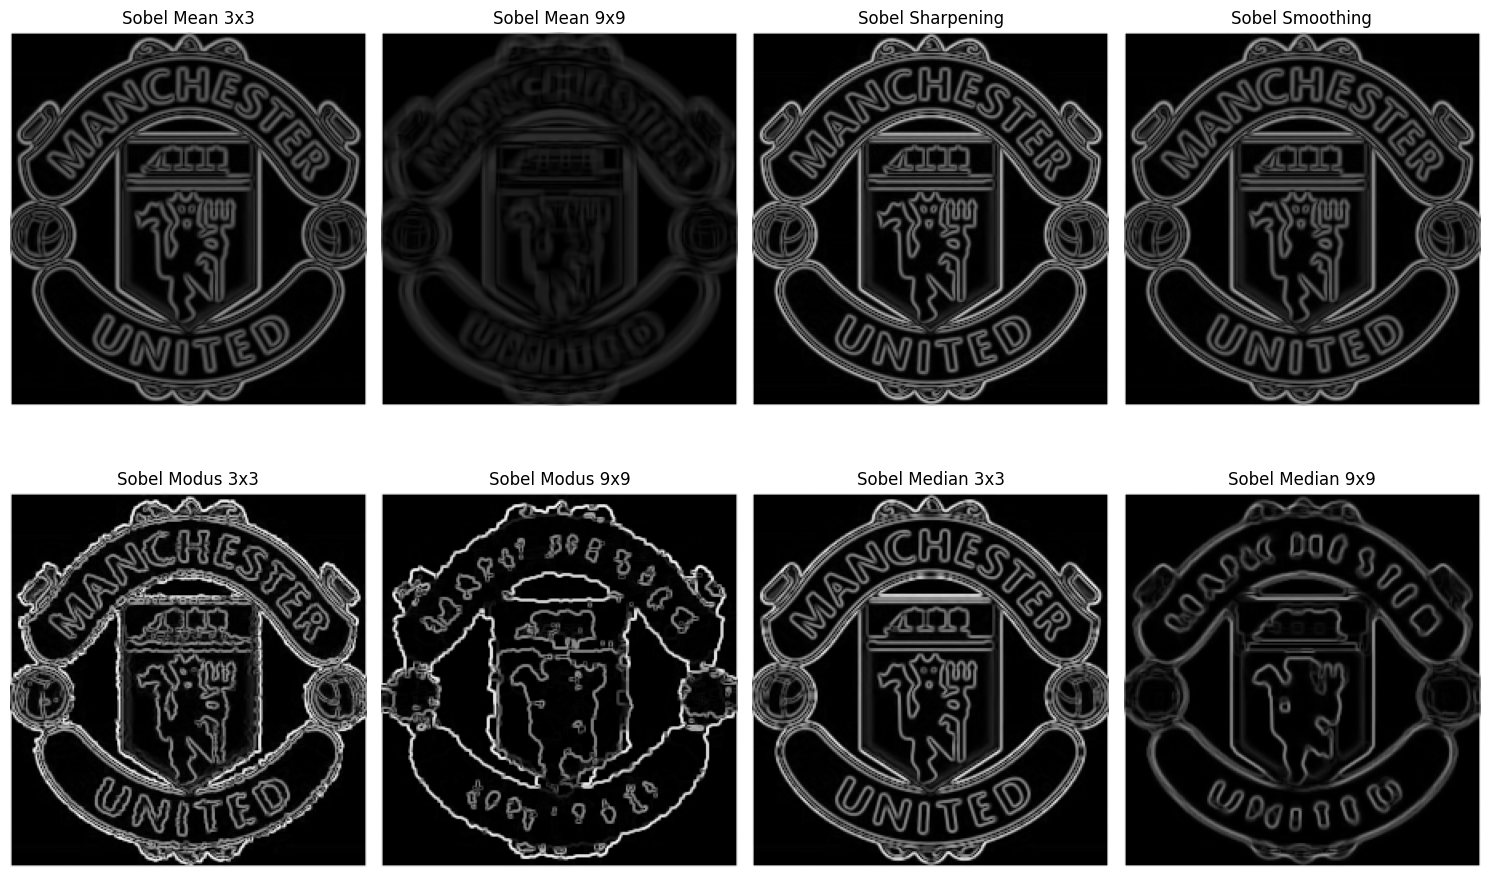

In [321]:
plt.figure(figsize=(15, 10))

plt.subplot(241), plt.imshow(hasilMeanS3x3, cmap='gray'), plt.title('Sobel Mean 3x3'), plt.axis("off")
plt.subplot(242), plt.imshow(hasilMeanS9x9, cmap='gray'), plt.title('Sobel Mean 9x9'), plt.axis("off")

plt.subplot(243), plt.imshow(hasilSharp, cmap='gray'), plt.title('Sobel Sharpening'), plt.axis("off")
plt.subplot(244), plt.imshow(hasilSmooth, cmap='gray'), plt.title('Sobel Smoothing'), plt.axis("off")

plt.subplot(245), plt.imshow(hasilModusS3x3, cmap='gray'), plt.title('Sobel Modus 3x3'), plt.axis("off")
plt.subplot(246), plt.imshow(hasilModusS9x9, cmap='gray'), plt.title('Sobel Modus 9x9'), plt.axis("off")

plt.subplot(247), plt.imshow(hasilMedianS3x3, cmap='gray'), plt.title('Sobel Median 3x3'), plt.axis("off")
plt.subplot(248), plt.imshow(hasilMedianS9x9, cmap='gray'), plt.title('Sobel Median 9x9'), plt.axis("off")

plt.tight_layout()
plt.show()

Kode di atas menggunakan matplotlib untuk membuat visualisasi dari hasil deteksi tepi menggunakan filter Sobel pada berbagai macam filter pemrosesan citra sebelumnya. Dalam gambar hasil, terdapat beberapa subplot yang masing-masing menampilkan citra hasil deteksi tepi dengan filter Sobel. Setiap subplot disusun secara berdampingan menggunakan `plt.subplot` dan diatur ukuran figur dengan `plt.figure(figsize=(15, 10))`. Setiap citra hasil deteksi tepi ditampilkan menggunakan `plt.imshow` dengan colormap 'gray' untuk menampilkan citra dalam skala abu-abu. Judul dari masing-masing subplot ditambahkan dengan `plt.title`, dan sumbu plotnya dinonaktifkan dengan `plt.axis("off")` agar tidak ditampilkan. Subplot-subplot tersebut terdiri dari hasil deteksi tepi menggunakan filter Sobel pada berbagai jenis filter pemrosesan citra sebelumnya, termasuk filter rata-rata (mean), filter sharpening, filter smoothing, filter modus, dan filter median, masing-masing dengan ukuran kernel 3x3 dan 9x9. Setelah semua subplot terdefinisi, `plt.tight_layout()` digunakan untuk memastikan bahwa semua subplot ditampilkan dengan baik dalam layout yang konsisten, dan `plt.show()` digunakan untuk menampilkan keseluruhan figur. Dengan demikian, kode ini memungkinkan untuk dengan jelas membandingkan hasil deteksi tepi menggunakan filter Sobel pada berbagai jenis filter pemrosesan citra yang telah diterapkan sebelumnya.

In [322]:
# Prewitt

# Mean
konvolusiMeanPX3x3 = konvolusi(meanFilter3x3,px)
konvolusiMeanPY3x3 = konvolusi(meanFilter3x3,py)
hasilMeanP3x3 = deteksi(meanFilter3x3, konvolusiMeanPX3x3, konvolusiMeanPY3x3)

konvolusiMeanPX9x9 = konvolusi(meanFilter9x9,px)
konvolusiMeanPY9x9 = konvolusi(meanFilter9x9,py)
hasilMeanP9x9 = deteksi(meanFilter9x9, konvolusiMeanPX9x9, konvolusiMeanPY9x9)

# Median
konvolusiMedianPX3x3 = konvolusi(medianFilter3x3,px)
konvolusiMedianPY3x3 = konvolusi(medianFilter3x3,py)
hasilMedianP3x3 = deteksi(medianFilter3x3, konvolusiMedianPX3x3, konvolusiMedianPY3x3)

konvolusiSMedianX9x9 = konvolusi(medianFilter9x9,px)
konvolusiMedianPY9x9 = konvolusi(medianFilter9x9,py)
hasilMedianP9x9 = deteksi(medianFilter9x9, konvolusiSMedianX9x9, konvolusiMedianPY9x9)

#Modus
konvolusiModusPX3x3 = konvolusi(modusFilter3x3,px)
konvolusiModusPY3x3 = konvolusi(modusFilter3x3,py)
hasilModusP3x3 = deteksi(modusFilter3x3, konvolusiModusPX3x3, konvolusiModusPY3x3)

konvolusiModusPX9x9 = konvolusi(modusFilter9x9,px)
konvolusiModusPY9x9 = konvolusi(modusFilter9x9,py)
hasilModusP9x9 = deteksi(modusFilter9x9, konvolusiModusPX9x9, konvolusiModusPY9x9)

# Sharpening
konvolusiSharpPX3x3 = konvolusi(sharpenedFilter,px)
konvolusiSharpPY3x3 = konvolusi(sharpenedFilter,py)
hasilSharpP = deteksi(sharpenedFilter, konvolusiSharpPX3x3, konvolusiSharpPY3x3)

# Smoothing
konvolusiSmoothPX3x3 = konvolusi(smoothedFilter,px)
konvolusiSmoothPY3x3 = konvolusi(smoothedFilter,py)
hasilSmoothP = deteksi(smoothedFilter, konvolusiSmoothPX3x3, konvolusiSmoothPY3x3)

Kode di atas mengimplementasikan penggunaan filter Prewitt untuk deteksi tepi pada berbagai jenis filter pemrosesan citra sebelumnya. Pertama, dilakukan konvolusi dengan filter Prewitt pada hasil dari filter rata-rata (mean) dengan ukuran kernel 3x3 dan 9x9, menghasilkan `konvolusiMeanPX3x3`, `konvolusiMeanPY3x3`, `konvolusiMeanPX9x9`, dan `konvolusiMeanPY9x9`. Langkah serupa dilakukan untuk hasil dari filter median dan modus, menghasilkan `konvolusiMedianPX3x3`, `konvolusiMedianPY3x3`, `konvolusiMedianPX9x9`, `konvolusiMedianPY9x9`, `konvolusiModusPX3x3`, `konvolusiModusPY3x3`, `konvolusiModusPX9x9`, dan `konvolusiModusPY9x9`. Selanjutnya, dilakukan proses konvolusi dengan filter Prewitt pada hasil dari filter sharpening dan smoothing, menghasilkan `konvolusiSharpPX3x3`, `konvolusiSharpPY3x3`, `konvolusiSmoothPX3x3`, dan `konvolusiSmoothPY3x3`. Setelah itu, masing-masing hasil konvolusi tersebut diolah untuk mendapatkan gradien magnitudo menggunakan fungsi `deteksi`. Dengan melakukan proses ini, kita dapat mengidentifikasi di mana tepi objek atau perubahan signifikan dalam intensitas citra terjadi setelah menerapkan filter Prewitt pada berbagai jenis filter pemrosesan citra sebelumnya.

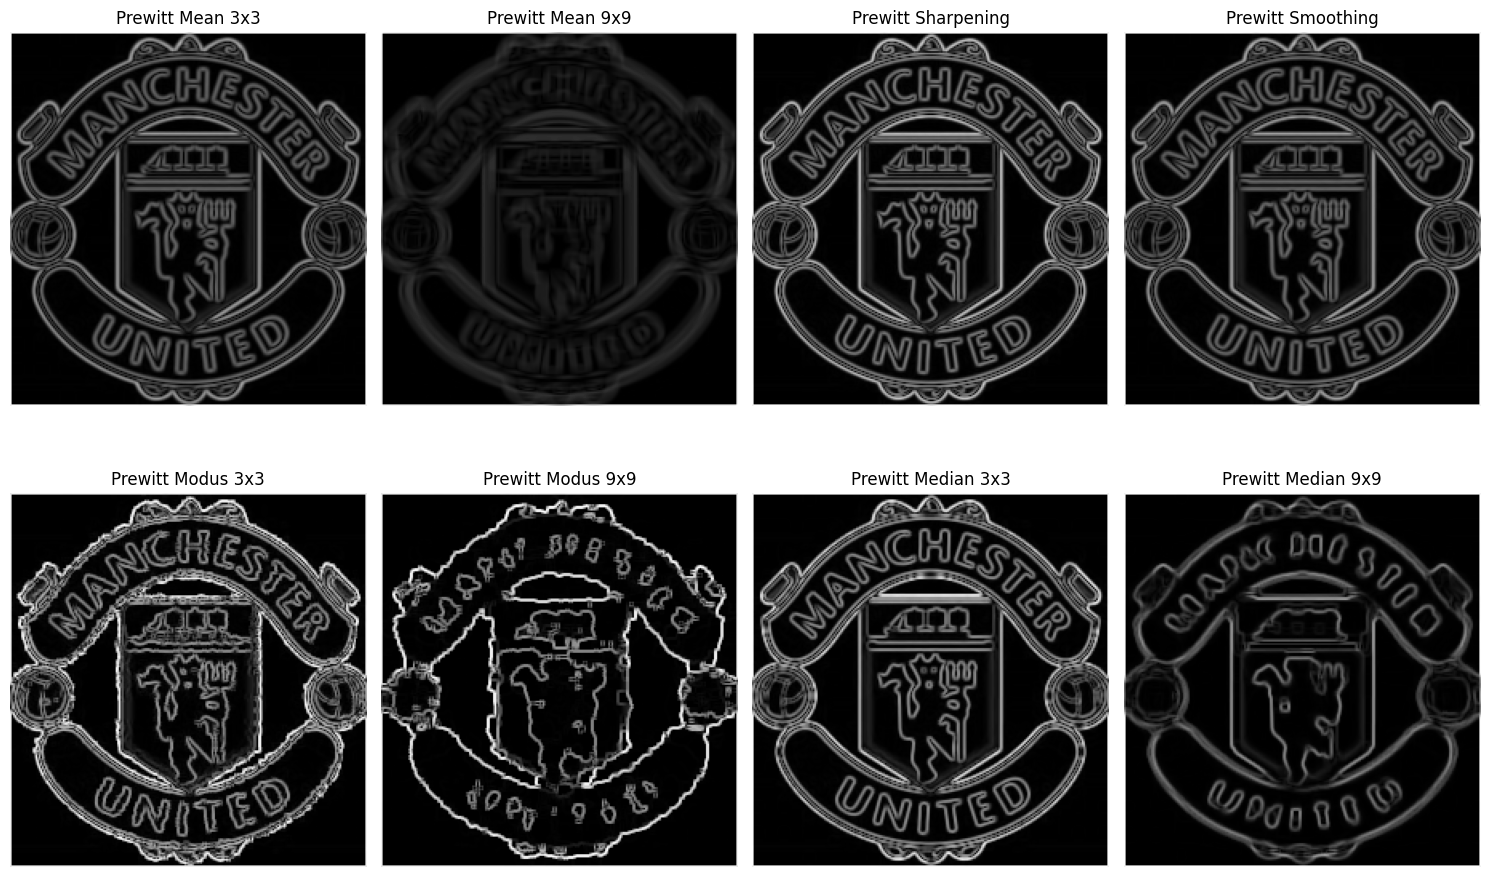

In [323]:
plt.figure(figsize=(15, 10))

plt.subplot(241), plt.imshow(hasilMeanP3x3, cmap='gray'), plt.title('Prewitt Mean 3x3'), plt.axis("off")
plt.subplot(242), plt.imshow(hasilMeanS9x9, cmap='gray'), plt.title('Prewitt Mean 9x9'), plt.axis("off")

plt.subplot(243), plt.imshow(hasilSharpP, cmap='gray'), plt.title('Prewitt Sharpening'), plt.axis("off")
plt.subplot(244), plt.imshow(hasilSmoothP, cmap='gray'), plt.title('Prewitt Smoothing'), plt.axis("off")

plt.subplot(245), plt.imshow(hasilModusP3x3, cmap='gray'), plt.title('Prewitt Modus 3x3'), plt.axis("off")
plt.subplot(246), plt.imshow(hasilModusP9x9, cmap='gray'), plt.title('Prewitt Modus 9x9'), plt.axis("off")

plt.subplot(247), plt.imshow(hasilMedianP3x3, cmap='gray'), plt.title('Prewitt Median 3x3'), plt.axis("off")
plt.subplot(248), plt.imshow(hasilMedianP9x9, cmap='gray'), plt.title('Prewitt Median 9x9'), plt.axis("off")

plt.tight_layout()
plt.show()

Kode di atas menggunakan matplotlib untuk membuat visualisasi dari hasil deteksi tepi menggunakan filter Prewitt pada berbagai jenis filter pemrosesan citra sebelumnya. Dalam gambar hasil, terdapat beberapa subplot yang masing-masing menampilkan citra hasil deteksi tepi dengan filter Prewitt. Setiap subplot disusun secara berdampingan menggunakan `plt.subplot` dan diatur ukuran figur dengan `plt.figure(figsize=(15, 10))`. Setiap citra hasil deteksi tepi ditampilkan menggunakan `plt.imshow` dengan colormap 'gray' untuk menampilkan citra dalam skala abu-abu. Judul dari masing-masing subplot ditambahkan dengan `plt.title`, dan sumbu plotnya dinonaktifkan dengan `plt.axis("off")` agar tidak ditampilkan. Subplot-subplot tersebut terdiri dari hasil deteksi tepi menggunakan filter Prewitt pada berbagai jenis filter pemrosesan citra sebelumnya, termasuk filter rata-rata (mean), filter sharpening, filter smoothing, filter modus, dan filter median, masing-masing dengan ukuran kernel 3x3 dan 9x9. Setelah semua subplot terdefinisi, `plt.tight_layout()` digunakan untuk memastikan bahwa semua subplot ditampilkan dengan baik dalam layout yang konsisten, dan `plt.show()` digunakan untuk menampilkan keseluruhan figur. Dengan demikian, kode ini memungkinkan untuk dengan jelas membandingkan hasil deteksi tepi menggunakan filter Prewitt pada berbagai jenis filter pemrosesan citra yang telah diterapkan sebelumnya.

In [324]:
# Robert

# Mean
konvolusiMeanRX3x3 = konvolusi(meanFilter3x3,rx)
konvolusiMeanRY3x3 = konvolusi(meanFilter3x3,ry)
hasilMeanR3x3 = deteksi(meanFilter3x3, konvolusiMeanRX3x3, konvolusiMeanRY3x3)

konvolusiMeanRX9x9 = konvolusi(meanFilter9x9,rx)
konvolusiMeanRY9x9 = konvolusi(meanFilter9x9,ry)
hasilMeanR9x9 = deteksi(meanFilter9x9, konvolusiMeanRX9x9, konvolusiMeanRY9x9)

# Median
konvolusiMedianRX3x3 = konvolusi(medianFilter3x3,rx)
konvolusiMedianRY3x3 = konvolusi(medianFilter3x3,ry)
hasilMedianR3x3 = deteksi(medianFilter3x3, konvolusiMedianRX3x3, konvolusiMedianRY3x3)

konvolusiSMedianX9x9 = konvolusi(medianFilter9x9,rx)
konvolusiMedianRY9x9 = konvolusi(medianFilter9x9,ry)
hasilMedianR9x9 = deteksi(medianFilter9x9, konvolusiSMedianX9x9, konvolusiMedianRY9x9)

#Modus
konvolusiModusRX3x3 = konvolusi(modusFilter3x3,rx)
konvolusiModusRY3x3 = konvolusi(modusFilter3x3,ry)
hasilModusR3x3 = deteksi(modusFilter3x3, konvolusiModusRX3x3, konvolusiModusRY3x3)

konvolusiModusRX9x9 = konvolusi(modusFilter9x9,rx)
konvolusiModusRY9x9 = konvolusi(modusFilter9x9,ry)
hasilModusR9x9 = deteksi(modusFilter9x9, konvolusiModusRX9x9, konvolusiModusRY9x9)

# Sharpening
konvolusiSharpRX3x3 = konvolusi(sharpenedFilter,rx)
konvolusiSharpRY3x3 = konvolusi(sharpenedFilter,ry)
hasilSharpR = deteksi(sharpenedFilter, konvolusiSharpRX3x3, konvolusiSharpRY3x3)

# Smoothing
konvolusiSmoothRX3x3 = konvolusi(smoothedFilter,rx)
konvolusiSmoothRY3x3 = konvolusi(smoothedFilter,ry)
hasilSmoothR = deteksi(smoothedFilter, konvolusiSmoothRX3x3, konvolusiSmoothRY3x3)

Kode di atas mengimplementasikan penggunaan filter Robert untuk deteksi tepi pada berbagai jenis filter pemrosesan citra sebelumnya. Pertama, dilakukan konvolusi dengan filter Robert pada hasil dari filter rata-rata (mean) dengan ukuran kernel 3x3 dan 9x9, menghasilkan `konvolusiMeanRX3x3`, `konvolusiMeanRY3x3`, `konvolusiMeanRX9x9`, dan `konvolusiMeanRY9x9`. Langkah serupa dilakukan untuk hasil dari filter median dan modus, menghasilkan `konvolusiMedianRX3x3`, `konvolusiMedianRY3x3`, `konvolusiMedianRX9x9`, `konvolusiMedianRY9x9`, `konvolusiModusRX3x3`, `konvolusiModusRY3x3`, `konvolusiModusRX9x9`, dan `konvolusiModusRY9x9`. Selanjutnya, dilakukan proses konvolusi dengan filter Robert pada hasil dari filter sharpening dan smoothing, menghasilkan `konvolusiSharpRX3x3`, `konvolusiSharpRY3x3`, `konvolusiSmoothRX3x3`, dan `konvolusiSmoothRY3x3`. Setelah itu, masing-masing hasil konvolusi tersebut diolah untuk mendapatkan gradien magnitudo menggunakan fungsi `deteksi`. Dengan melakukan proses ini, kita dapat mengidentifikasi di mana tepi objek atau perubahan signifikan dalam intensitas citra terjadi setelah menerapkan filter Robert pada berbagai jenis filter pemrosesan citra sebelumnya.

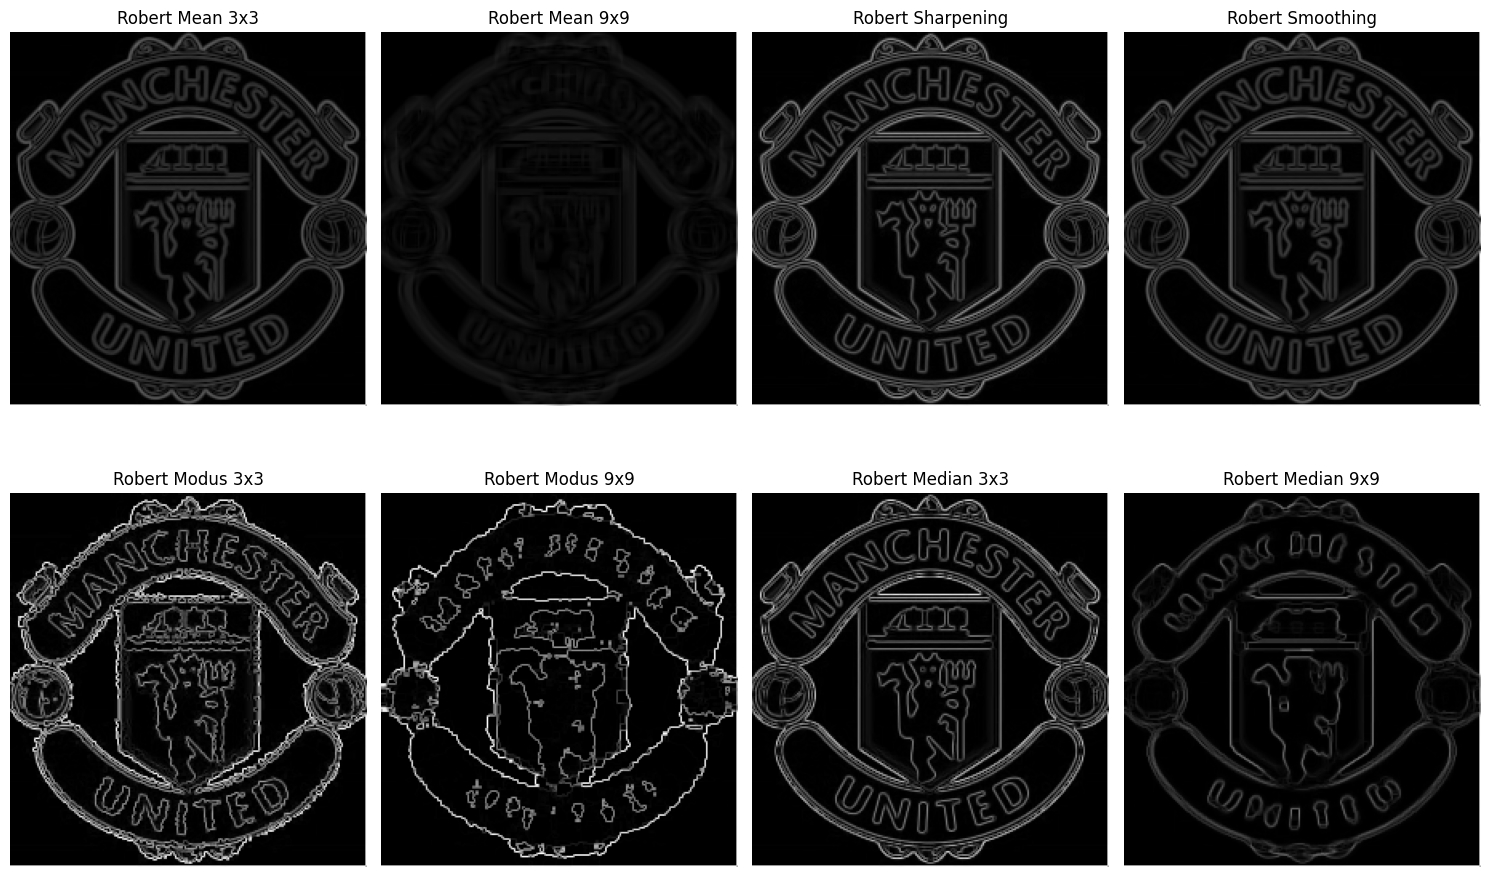

In [325]:
plt.figure(figsize=(15, 10))

plt.subplot(241), plt.imshow(hasilMeanR3x3, cmap='gray'), plt.title('Robert Mean 3x3'), plt.axis("off")
plt.subplot(242), plt.imshow(hasilMeanR9x9, cmap='gray'), plt.title('Robert Mean 9x9'), plt.axis("off")

plt.subplot(243), plt.imshow(hasilSharpR, cmap='gray'), plt.title('Robert Sharpening'), plt.axis("off")
plt.subplot(244), plt.imshow(hasilSmoothR, cmap='gray'), plt.title('Robert Smoothing'), plt.axis("off")

plt.subplot(245), plt.imshow(hasilModusR3x3, cmap='gray'), plt.title('Robert Modus 3x3'), plt.axis("off")
plt.subplot(246), plt.imshow(hasilModusR9x9, cmap='gray'), plt.title('Robert Modus 9x9'), plt.axis("off")

plt.subplot(247), plt.imshow(hasilMedianR3x3, cmap='gray'), plt.title('Robert Median 3x3'), plt.axis("off")
plt.subplot(248), plt.imshow(hasilMedianR9x9, cmap='gray'), plt.title('Robert Median 9x9'), plt.axis("off")

plt.tight_layout()
plt.show()

Kode di atas menggunakan matplotlib untuk membuat visualisasi dari hasil deteksi tepi menggunakan filter Robert pada berbagai jenis filter pemrosesan citra sebelumnya. Terdapat beberapa subplot yang masing-masing menampilkan citra hasil deteksi tepi dengan filter Robert. Setiap subplot disusun secara berdampingan menggunakan `plt.subplot` dan diatur ukuran figur dengan `plt.figure(figsize=(15, 10))`. Setiap citra hasil deteksi tepi ditampilkan menggunakan `plt.imshow` dengan colormap 'gray' untuk menampilkan citra dalam skala abu-abu. Judul dari masing-masing subplot ditambahkan dengan `plt.title`, dan sumbu plotnya dinonaktifkan dengan `plt.axis("off")` agar tidak ditampilkan. Subplot-subplot tersebut terdiri dari hasil deteksi tepi menggunakan filter Robert pada berbagai jenis filter pemrosesan citra sebelumnya, termasuk filter rata-rata (mean), filter sharpening, filter smoothing, filter modus, dan filter median, masing-masing dengan ukuran kernel 3x3 dan 9x9. Setelah semua subplot terdefinisi, `plt.tight_layout()` digunakan untuk memastikan bahwa semua subplot ditampilkan dengan baik dalam layout yang konsisten, dan `plt.show()` digunakan untuk menampilkan keseluruhan figur. Dengan demikian, kode ini memungkinkan untuk dengan jelas membandingkan hasil deteksi tepi menggunakan filter Robert pada berbagai jenis filter pemrosesan citra yang telah diterapkan sebelumnya.